https://scikit-learn.org/stable/modules/model_evaluation.html

In [1]:
library(caTools)
library(readr)
library(dplyr)
library(rpart)
library(caret)
library(dplyr)
library(tidyverse)
require(caTools)
library(png)
library(MLmetrics)


Warning message:
"package 'caTools' was built under R version 4.0.4"
Warning message:
"package 'readr' was built under R version 4.0.4"
Warning message:
"package 'dplyr' was built under R version 4.0.4"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'caret' was built under R version 4.0.2"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.4"
Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.1.0     v stringr 1.4.0
v tidyr   1.1.3     v forcats 0.5.1
v purrr   0.3.4     

Warning message:
"package 'tibble' was built under R version 4.0.4"
Warning message:
"package 'tidyr' w

In [2]:
data <- read_csv("data_titanic.csv") 

Warning message:
"Missing column names filled in: 'X1' [1]"

-- Column specification ------------------------------------------------------------------------------------------------
cols(
  X1 = col_double(),
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character(),
  FamilySize = col_double(),
  Title = col_character(),
  Surname = col_character(),
  FamilyId = col_character(),
  Deck = col_character()
)




In [3]:
data=data[c("Pclass","Age","Sex","SibSp","Parch","Fare","Embarked","Title","FamilySize","Deck","Survived")]

In [4]:
set.seed(1000)
sample = sample.split(data$Survived, SplitRatio = .75)
train_d = subset(data, sample == TRUE)
test_d  = subset(data, sample == FALSE)

In [5]:
modelo <- rpart(factor(Survived) ~ Pclass + Age + Sex + SibSp + Parch + Fare + Embarked + Title + FamilySize  + Deck, data = train_d, method = 'class')

Antes de adentrarnos en los detalles de las diferentes métricas de
calificación, vamos a echar un vistazo a una matriz de confusión,
una matriz que dispone el rendimiento de un algoritmo de
aprendizaje. 

La matriz de confusión es simplemente una matriz
cuadrática que informa del recuento de las predicciones de
- Verdadero positivo (TP)
- Verdadero negativo (TN)
- Falso positivo (FP)
- Falso negativo (FN)

In [6]:
#Realizar el punto de corte
yprob <- predict(modelo, #modelo
                  newdata= test_d[,1:11], #valores de los predictore
                  type="prob")

ypred <- (yprob[,1] >= 0.33)
#Categorizar la variable target
ypred <-str_replace(ypred,"FALSE", "1")
ypred <-str_replace(ypred,"TRUE", "0")
ypred <-as.numeric(ypred)
ytrue <- test_d$Survived

In [7]:
tabla=table(factor(ypred,levels = c(0,1)),factor(ytrue,levels = c(0,1)))
tabla

   
      0   1
  0 128  30
  1   9  56

In [8]:
TP=tabla[1,1]#Verdadero Positivo A
FN=tabla[2,1]#Falso Negativo B
FP=tabla[1,2]#Falso Positivo C
TN=tabla[2,2]#Verdadero Negativo D

print(paste("Verdadero Positivo(TP):",TP))
print(paste("Falso Negativo(FN):",FN))
print(paste("Falso Positivo(FP):",FP))
print(paste("Verdadero Negativo(TN):",TN))

[1] "Verdadero Positivo(TP): 128"
[1] "Falso Negativo(FN): 9"
[1] "Falso Positivo(FP): 30"
[1] "Verdadero Negativo(TN): 56"


In [9]:
ypred2 = factor(ypred,levels = c(0,1))
ytrue2 = factor(ytrue,levels = c(0,1))
confusionMatrix(ypred2, #valores predichos
                ytrue2) #valores reales

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 128  30
         1   9  56
                                          
               Accuracy : 0.8251          
                 95% CI : (0.7688, 0.8726)
    No Information Rate : 0.6143          
    P-Value [Acc > NIR] : 6.993e-12       
                                          
                  Kappa : 0.6133          
                                          
 Mcnemar's Test P-Value : 0.001362        
                                          
            Sensitivity : 0.9343          
            Specificity : 0.6512          
         Pos Pred Value : 0.8101          
         Neg Pred Value : 0.8615          
             Prevalence : 0.6143          
         Detection Rate : 0.5740          
   Detection Prevalence : 0.7085          
      Balanced Accuracy : 0.7927          
                                          
       'Positive' Class : 0               
                              

Antes de mostrar las diferentes metricas utilizamos la funcion ConfusionMatrix para obtener los diferentes resultados

## Accuracy

Tanto la predicción error (ERR) como la precisión (ACC)
proporcionan información general sobre los errores de clasificación
de algunas muestras. El error se puede entender como la suma de
todas las falsas predicciones dividida por el número de
predicciones totales, y la precisión se calcula como la suma de
predicciones correctas dividida por el número total de predicciones:

\begin{equation}
 ERR = \frac{FP+FN}{FP+FN+TP+TN}
\end{equation}

In [10]:
ERR=(FP+FN)/(FP+FN+TP+TN)
round(ERR,4)

[1] 0.1749

La precisión de la predicción también se puede calcular
directamente del error:

\begin{equation}
 ACC = \frac{TP+TN}{FP+FN+TP+TN} = 1-ERR
\end{equation}

In [11]:
ACC=(TP+TN)/(FP+FN+TP+TN)
round(ACC,4)

[1] 0.8251

In [12]:
acc_ml=MLmetrics::Accuracy(ypred2,ytrue2)
round(acc_ml,4)

[1] 0.8251

## Precision

La exactitud se define como la proporción de positivos reales, que se pronosticaron como positivos (o verdaderos positivos). Esto implica que habrá otra proporción de positivos reales, que se predijeron como negativos y podrían denominarse falsos positivos. 

\begin{equation}
Precision = \frac{TP}{(TP+FN)}
\end{equation}

In [13]:
PRECISION=TP/(TP+FN)
round(PRECISION,4)

[1] 0.9343

In [14]:
precision_ml=MLmetrics::Precision(ypred2,ytrue2)
round(precision_ml,4)

[1] 0.9343

## Recall o Sensitivity o TPR

El recall es la proporción donde está el número de verdaderos positivos y el número de falsos negativos. El recall es intuitivamente la capacidad del clasificador de encontrar todas las muestras positivas.

\begin{equation}
    Sensitivity =  \frac{TP}{(FP+TP)}
\end{equation}

In [15]:
SENSITIVITY=TP/(TP+FP)#lIBRO
round(SENSITIVITY,4)

[1] 0.8101

In [16]:
Sensitivity_ml=MLmetrics::Sensitivity(ypred2,ytrue2)
round(Sensitivity_ml,4)

[1] 0.8101

## Specificity o TNR

La especificidad se define como la proporción de negativos reales, que se pronosticaron como negativos (o verdaderos negativos). Esto implica que habrá otra proporción de negativos reales, que se predijeron como positivos y podrían denominarse falsos negativos. 

\begin{equation}
Specificity = \frac{TN}{(FN+TN)}
\end{equation}

In [17]:
SPECIFICITY=TN/(TN+FN)
round(SPECIFICITY,4)

[1] 0.8615

In [18]:
Specificity_ml=MLmetrics::Specificity(ypred2,ytrue2)
round(Specificity_ml,4)

[1] 0.8615

## Balanced Accuracy(Precision Equilibridad)

Se basa en dos métricas más utilizadas: sensibilidad y specificity

En problemas de clasificación binaria y multiclase para hacer frente a conjuntos de datos desequilibrados. Se define como el promedio de recuerdo obtenido en cada clase. 

\begin{equation}
Balanced Accuracy = \frac{(sensitivity+specificity)}{2}
\end{equation}

In [19]:
BALANCED_ACCURACY=(SENSITIVITY+SPECIFICITY)/2
round(BALANCED_ACCURACY,4)

[1] 0.8358

In [20]:
balanced_ml=(Sensitivity_ml+Specificity_ml)/2
round(balanced_ml,4)

[1] 0.8358

## F1-SCORE

El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

\begin{equation}
F1 = 2*\frac{PRECISION*SENSITIVITY}{PRECISION + SENSITIVITY}
\end{equation}

In [21]:
F1_SCORE=(2*PRECISION*SENSITIVITY) / (PRECISION + SENSITIVITY)
round(F1_SCORE,4)

[1] 0.8678

In [22]:
f1_ml=MLmetrics::F1_Score(ytrue2,ypred2)
round(f1_ml,4)

[1] 0.8678

### AUC(Area bajo la curva ROC)

Son útiles
herramientas para seleccionar modelos para clasificación basados
en su rendimiento respecto al FPR y al TPR, que se calculan
desplazando el umbral de decisión del clasificador. 

\begin{equation}
    0.5≤A≤1
\end{equation}

- Si A=0.5, indica que el test no es válido, pues la proporción de verdaderos positivos
sería igual a la proporción de falsos positivos(Adivinación Aleatoria)

- Si A=1, significa que el test es perfecto, existiría una región en la que, cualquier
punto de corte, tiene sensibilidad y especificidad iguales a 1(Puntuación Perfecta)

Nota:
    En caso de que el A sea menor a 0.5 se considera peor que la adivinación aleatoria

Warning message:
"package 'ROCR' was built under R version 4.0.3"


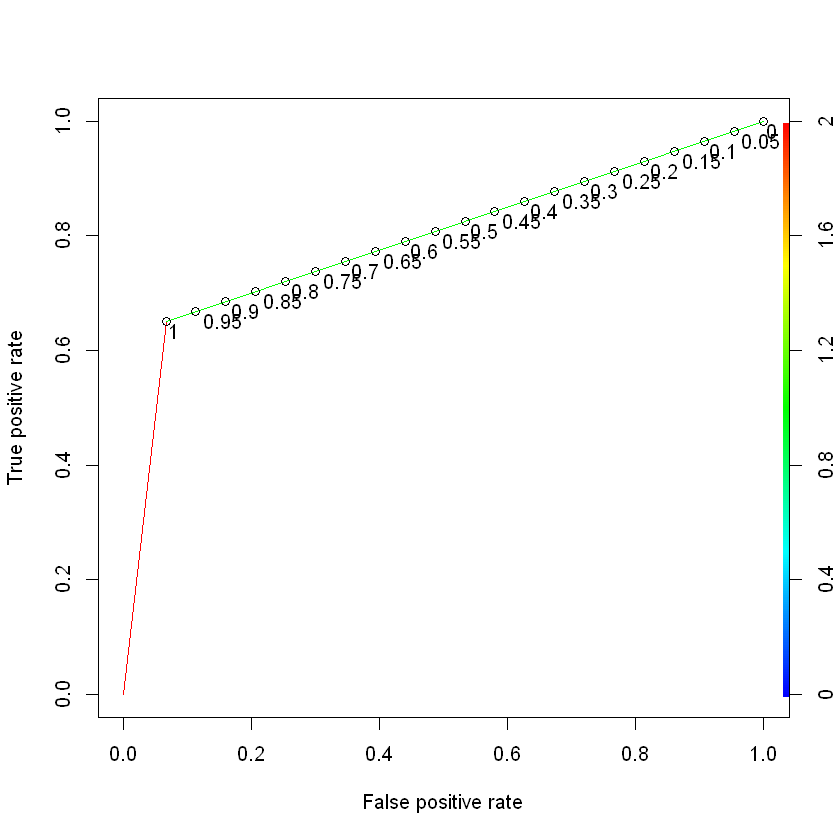

In [23]:
library(ROCR)

roc_pred <- prediction(predictions = ypred  , labels = ytrue)
roc_perf <- performance(roc_pred , "tpr" , "fpr")
plot(roc_perf,
     colorize = TRUE,
     print.cutoffs.at= seq(0,1,0.05),
     text.adj=c(-0.2,1.7))

El eje x es la tasa de falsos positivos y el eje y es la tasa de verdaderos positivos. Podemos ver que cada uno de los puntos representa una matriz de confusión (como la que creamos anteriormente) que no tenemos que evaluar manualmente. Los puntos representan la compensación entre verdadero positivo y falso positivo. 

El AUC proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio. 

In [24]:
auc_ROCR <- performance(roc_pred, measure = "auc")
auc_ROCR <- auc_ROCR@y.values[[1]]
round(auc_ROCR,4)

[1] 0.7927

In [25]:
auc_ml=MLmetrics::AUC(ypred2, ytrue2)
round(auc_ml,4)

[1] 0.7927